In [2]:
import numpy as np
import pandas as pd
import scipy.io
import os
import re

import matplotlib.pyplot as plt

plt.jet()

%matplotlib inline

In [3]:
ctrlFolder = '/Users/bxin/wavefront/ocs_m1_dcs/src/etc/conf/m1_ctrl_pkg/m1_support_ctrl/'
FB_K_file = 'm1_force_distribution_matrix_conf.coffee'
filename = os.path.join(ctrlFolder, FB_K_file)

fid = open(filename)
KMat = np.zeros((170*3, 6))
i = 0
for line in fid:
    if len(line)>50:
        a = re.split('\[|]|,',line)
        a = [x for x in a if (x and not x.isspace() and x!='\n')]
        KMat[i,:] = a
        i += 1

In [4]:
dataFolder = '/Users/bxin/Library/CloudStorage/OneDrive-SharedLibraries-GMTOCorp/M1S Portal - Documents'

#read SA data
dfSA = pd.read_excel(dataFolder+'/2.4 Utilities/03. Utilities Distribution/utility_mapping_M1B_labels-16-Feb-2023.xlsx')
sax = np.array(dfSA['x_m']) #in M1B
say = np.array(dfSA['y_m'])
saz = np.array(dfSA['z_m'])
saID = np.array(dfSA['LSNo'])

In [30]:
KMat.shape

(510, 6)

<div>
<img src="KMat.png" width="500"/>
</div>

In [5]:
Fxx = np.array([KMat[3*i,0] for i in range(170)])
Fzx = np.array([KMat[3*i+2,0] for i in range(170)])
Fyy = np.array([KMat[3*i+1,1] for i in range(170)])
Fzy = np.array([KMat[3*i+2,1] for i in range(170)])
Fzz = np.array([KMat[3*i+2,2] for i in range(170)])

yyy = np.array([KMat[3*i+2,3] for i in range(170)])
xxx = np.array([KMat[3*i+2,4] for i in range(170)])
Mzx = np.array([KMat[3*i,5] for i in range(170)])
Mzy = np.array([KMat[3*i+1,5] for i in range(170)])

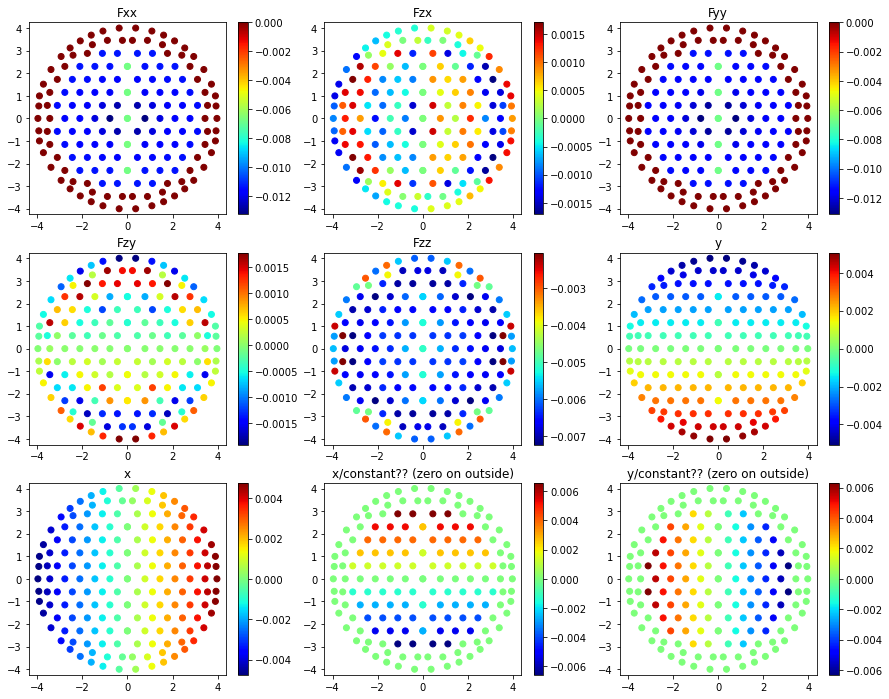

In [50]:
fig, ax = plt.subplots(3,3, figsize=(15,12))
img = ax[0][0].scatter(sax, say, c=Fxx)
fig.colorbar(img, ax=ax[0][0])
img = ax[0][1].scatter(sax, say, c=Fzx)
fig.colorbar(img, ax=ax[0][1])
img = ax[0][2].scatter(sax, say, c=Fyy)
fig.colorbar(img, ax=ax[0][2])
ax[0][0].set_title('Fxx')
ax[0][1].set_title('Fzx')
ax[0][2].set_title('Fyy')

img = ax[1][0].scatter(sax, say, c=Fzy)
fig.colorbar(img, ax=ax[1][0])
img = ax[1][1].scatter(sax, say, c=Fzz)
fig.colorbar(img, ax=ax[1][1])
img = ax[1][2].scatter(sax, say, c=yyy)
fig.colorbar(img, ax=ax[1][2])
ax[1][0].set_title('Fzy')
ax[1][1].set_title('Fzz')
ax[1][2].set_title('y')

img = ax[2][0].scatter(sax, say, c=xxx)
fig.colorbar(img, ax=ax[2][0])
img = ax[2][1].scatter(sax, say, c=Mzx)
fig.colorbar(img, ax=ax[2][1])
img = ax[2][2].scatter(sax, say, c=Mzy)
fig.colorbar(img, ax=ax[2][2])
ax[2][0].set_title('x')
ax[2][1].set_title('x/constant?? (zero on outside)')
ax[2][2].set_title('y/constant?? (zero on outside)')

for i in range(3):
    for j in range(3):
            ax[i][j].axis('equal')  

In [41]:
#check this is all zeros
np.array([KMat[3*i+1,0] for i in range(170)])

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [7]:
print(KMat[0,5], KMat[2,3])

-3.2356775e-08 1.7958974e-08
